In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Generate synthetic cat breed dataset
np.random.seed(42)

breeds = ['Persian', 'Siamese', 'Maine Coon', 'Bengal', 'British Shorthair']
n_samples = 500

In [60]:
# Features: weight(kg), height(cm), fur_length(cm), ear_size(cm), tail_length(cm), age(years)
data = []

for breed in breeds:
    for i in range(n_samples // len(breeds)):
        if breed == 'Persian':
            sample = [
                np.random.normal(4.5, 0.5),  # weight
                np.random.normal(25, 2),     # height
                np.random.normal(8, 1),      # fur_length
                np.random.normal(5, 0.5),    # ear_size
                np.random.normal(20, 2),     # tail_length
                np.random.randint(1, 15)     # age
            ]
        elif breed == 'Siamese':
            sample = [
                np.random.normal(3.5, 0.4),
                np.random.normal(28, 2),
                np.random.normal(2, 0.5),
                np.random.normal(6, 0.5),
                np.random.normal(25, 2),
                np.random.randint(1, 15)
            ]
        elif breed == 'Maine Coon':
            sample = [
                np.random.normal(7, 0.8),
                np.random.normal(32, 2),
                np.random.normal(10, 1),
                np.random.normal(7, 0.5),
                np.random.normal(30, 2),
                np.random.randint(1, 15)
            ]
        elif breed == 'Bengal':
            sample = [
                np.random.normal(5, 0.5),
                np.random.normal(27, 2),
                np.random.normal(3, 0.5),
                np.random.normal(5.5, 0.5),
                np.random.normal(23, 2),
                np.random.randint(1, 15)
            ]
        else:  # British Shorthair
            sample = [
                np.random.normal(5.5, 0.6),
                np.random.normal(26, 2),
                np.random.normal(4, 0.5),
                np.random.normal(5, 0.5),
                np.random.normal(22, 2),
                np.random.randint(1, 15)
            ]
        
        data.append(sample + [breed])


In [61]:
# Create DataFrame
columns = ['weight_kg', 'height_cm', 'fur_length_cm', 'ear_size_cm', 'tail_length_cm', 'age_years', 'breed']
df = pd.DataFrame(data, columns=columns)

print("=" * 60)
print("CAT BREED CLASSIFICATION PROJECT")
print("=" * 60)
print(f"\nDataset Overview:")
print(f"Total samples: {len(df)}")
print(f"\nBreed distribution:")
print(df['breed'].value_counts())
print(f"\nDataset preview:")
print(df.head(10))
print(f"\nStatistical summary:")
print(df.describe())


CAT BREED CLASSIFICATION PROJECT

Dataset Overview:
Total samples: 500

Breed distribution:
breed
Persian              100
Siamese              100
Maine Coon           100
Bengal               100
British Shorthair    100
Name: count, dtype: int64

Dataset preview:
   weight_kg  height_cm  fur_length_cm  ear_size_cm  tail_length_cm  \
0   4.748357  24.723471       8.647689     5.761515       19.531693   
1   4.382932  20.978074       7.507197     5.196290       18.141631   
2   4.209561  23.949660       7.428620     4.537959       14.774902   
3   4.975185  20.121788       8.603441     4.874478       19.672266   
4   4.533764  22.150504       7.455617     5.055461       17.698013   
5   4.687849  20.946561       9.119424     5.389596       17.797804   
6   4.233176  24.988944       7.770550     5.194674       17.469762   
7   5.045996  25.646000       6.606583     3.910833       17.912207   
8   4.869233  25.342737       7.884352     4.849448       17.042956   
9   4.140078  25.921633

In [62]:
# Prepare features and target
X = df.drop('breed', axis=1)
y = df['breed']

In [63]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [64]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")



Training set size: 400
Testing set size: 100


In [65]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
#Train Random Forest Classifier
print("\n" + "=" * 60)
print("TRAINING MODEL...")
print("=" * 60)

clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
clf.fit(X_train_scaled, y_train)


TRAINING MODEL...


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [67]:
# Make predictions
y_pred = clf.predict(X_test_scaled)


Model Accuracy: 93.00%

CLASSIFICATION REPORT
                   precision    recall  f1-score   support

           Bengal       0.85      0.85      0.85        20
British Shorthair       0.86      0.90      0.88        20
       Maine Coon       1.00      1.00      1.00        20
          Persian       1.00      0.95      0.97        20
          Siamese       0.95      0.95      0.95        20

         accuracy                           0.93       100
        macro avg       0.93      0.93      0.93       100
     weighted avg       0.93      0.93      0.93       100


CONFUSION MATRIX
[[17  2  0  0  1]
 [ 2 18  0  0  0]
 [ 0  0 20  0  0]
 [ 0  1  0 19  0]
 [ 1  0  0  0 19]]

FEATURE IMPORTANCE
          feature  importance
2   fur_length_cm    0.363029
0       weight_kg    0.249300
4  tail_length_cm    0.152273
3     ear_size_cm    0.144895
1       height_cm    0.073850
5       age_years    0.016653


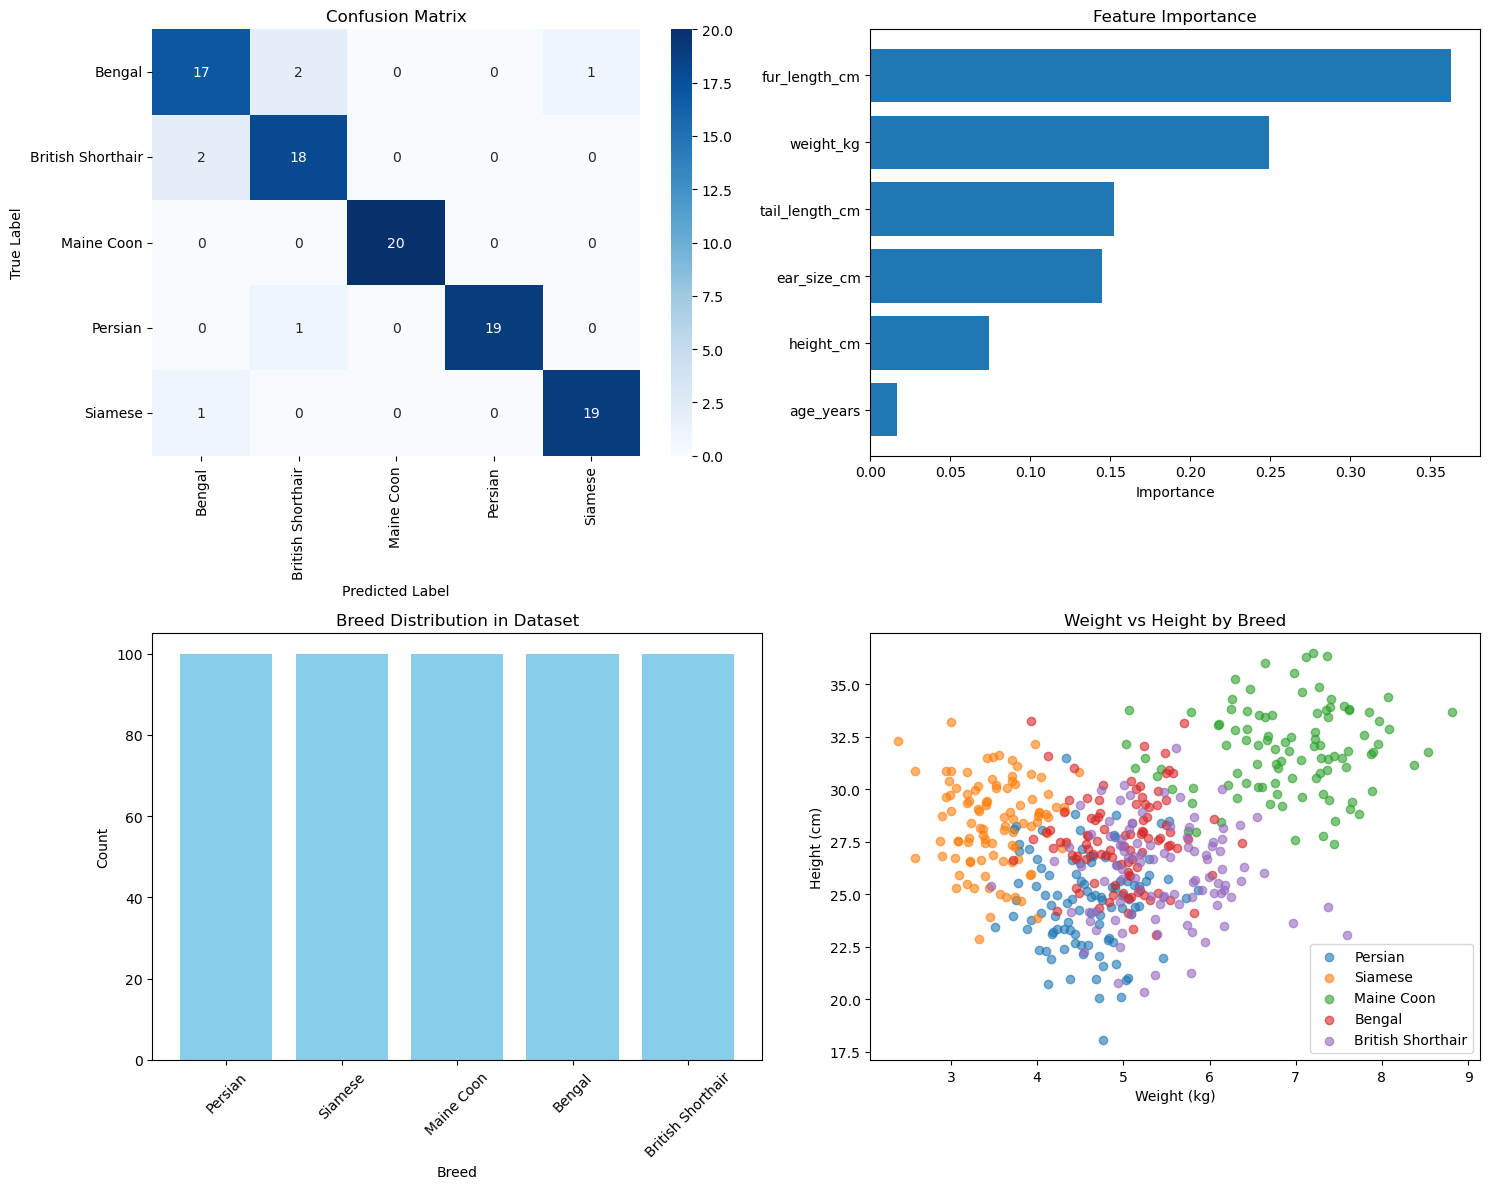

In [68]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

print("\n" + "=" * 60)
print("CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n" + "=" * 60)
print("CONFUSION MATRIX")
print("=" * 60)
print(cm)

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "=" * 60)
print("FEATURE IMPORTANCE")
print("=" * 60)
print(feature_importance)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix')
axes[0, 0].set_ylabel('True Label')
axes[0, 0].set_xlabel('Predicted Label')

# 2. Feature Importance
axes[0, 1].barh(feature_importance['feature'], feature_importance['importance'])
axes[0, 1].set_xlabel('Importance')
axes[0, 1].set_title('Feature Importance')
axes[0, 1].invert_yaxis()

# 3. Breed distribution
breed_counts = df['breed'].value_counts()
axes[1, 0].bar(breed_counts.index, breed_counts.values, color='skyblue')
axes[1, 0].set_xlabel('Breed')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Breed Distribution in Dataset')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Weight vs Height by Breed
for breed in breeds:
    breed_data = df[df['breed'] == breed]
    axes[1, 1].scatter(breed_data['weight_kg'], breed_data['height_cm'], 
                       label=breed, alpha=0.6)
axes[1, 1].set_xlabel('Weight (kg)')
axes[1, 1].set_ylabel('Height (cm)')
axes[1, 1].set_title('Weight vs Height by Breed')
axes[1, 1].legend()

plt.tight_layout()
plt.show()



In [70]:
# Example predictions
print("\n" + "=" * 60)
print("EXAMPLE PREDICTIONS")
print("=" * 60)
# Test with new sample cats
test_samples = [
    [4.5, 25, 8, 5, 20, 3],  # Persian-like
    [7.2, 32, 10, 7, 30, 5],  # Maine Coon-like
    [3.6, 28, 2, 6, 25, 2],  # Siamese-like
]

test_samples_scaled = scaler.transform(test_samples)
predictions = clf.predict(test_samples_scaled)
probabilities = clf.predict_proba(test_samples_scaled)

for i, (sample, pred, probs) in enumerate(zip(test_samples, predictions, probabilities)):
    print(f"\nSample {i+1}: {sample}")
    print(f"Predicted breed: {le.inverse_transform([pred])[0]}")
    print(f"Confidence: {max(probs)*100:.2f}%")
    print("Probabilities for each breed:")
    for breed, prob in zip(le.classes_, probs):
        print(f"  {breed}: {prob*100:.2f}%")

print("\n" + "=" * 60)
print("MODEL TRAINING COMPLETE!")
print("=" * 60)


EXAMPLE PREDICTIONS

Sample 1: [4.5, 25, 8, 5, 20, 3]
Predicted breed: Persian
Confidence: 99.00%
Probabilities for each breed:
  Bengal: 0.00%
  British Shorthair: 1.00%
  Maine Coon: 0.00%
  Persian: 99.00%
  Siamese: 0.00%

Sample 2: [7.2, 32, 10, 7, 30, 5]
Predicted breed: Maine Coon
Confidence: 100.00%
Probabilities for each breed:
  Bengal: 0.00%
  British Shorthair: 0.00%
  Maine Coon: 100.00%
  Persian: 0.00%
  Siamese: 0.00%

Sample 3: [3.6, 28, 2, 6, 25, 2]
Predicted breed: Siamese
Confidence: 100.00%
Probabilities for each breed:
  Bengal: 0.00%
  British Shorthair: 0.00%
  Maine Coon: 0.00%
  Persian: 0.00%
  Siamese: 100.00%

MODEL TRAINING COMPLETE!


C:\Users\Juveria\OneDrive\Desktop\clgproj\heart-disease-project\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
